In [72]:
# install library
#!pip install flair
#!pip install textblob
#!pip install nltk
#!pip install vaderSentiment
#!pip install emoji

In [73]:
# import libraries
import pandas as pd
import seaborn as sns
import flair
import numpy as np
import re
import emoji
import nltk
from flair.data import Label
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')

# the threshold which indicates valid prediction.
#THRESHOLD = 0.5

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\firew\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
# emoticons
def load_dict_smileys():
    
    return {
        ":‑)":"smiley",
        ":-]":"smiley",
        ":-3":"smiley",
        ":->":"smiley",
        "8-)":"smiley",
        ":-}":"smiley",
        ":)":"smiley",
        ":]":"smiley",
        ":3":"smiley",
        ":>":"smiley",
        "8)":"smiley",
        ":}":"smiley",
        ":o)":"smiley",
        ":c)":"smiley",
        ":^)":"smiley",
        "=]":"smiley",
        "=)":"smiley",
        ":-))":"smiley",
        ":‑D":"smiley",
        "8‑D":"smiley",
        "x‑D":"smiley",
        "X‑D":"smiley",
        ":D":"smiley",
        "8D":"smiley",
        "xD":"smiley",
        "XD":"smiley",
        ":‑(":"sad",
        ":‑c":"sad",
        ":‑<":"sad",
        ":‑[":"sad",
        ":(":"sad",
        ":c":"sad",
        ":<":"sad",
        ":[":"sad",
        ":-||":"sad",
        ">:[":"sad",
        ":{":"sad",
        ":@":"sad",
        ">:(":"sad",
        ":'‑(":"sad",
        ":'(":"sad",
        ":‑P":"playful",
        "X‑P":"playful",
        "x‑p":"playful",
        ":‑p":"playful",
        ":‑Þ":"playful",
        ":‑þ":"playful",
        ":‑b":"playful",
        ":P":"playful",
        "XP":"playful",
        "xp":"playful",
        ":p":"playful",
        ":Þ":"playful",
        ":þ":"playful",
        ":b":"playful",
        "<3":"love"
        }

# self defined contractions
def load_dict_contractions():
    
    return {
        "ain't":"is not",
        "amn't":"am not",
        "aren't":"are not",
        "can't":"cannot",
        "'cause":"because",
        "couldn't":"could not",
        "couldn't've":"could not have",
        "could've":"could have",
        "daren't":"dare not",
        "daresn't":"dare not",
        "dasn't":"dare not",
        "didn't":"did not",
        "doesn't":"does not",
        "don't":"do not",
        "e'er":"ever",
        "em":"them",
        "everyone's":"everyone is",
        "finna":"fixing to",
        "gimme":"give me",
        "gonna":"going to",
        "gon't":"go not",
        "gotta":"got to",
        "hadn't":"had not",
        "hasn't":"has not",
        "haven't":"have not",
        "he'd":"he would",
        "he'll":"he will",
        "he's":"he is",
        "he've":"he have",
        "how'd":"how would",
        "how'll":"how will",
        "how're":"how are",
        "how's":"how is",
        "I'd":"I would",
        "I'll":"I will",
        "I'm":"I am",
        "I'm'a":"I am about to",
        "I'm'o":"I am going to",
        "isn't":"is not",
        "it'd":"it would",
        "it'll":"it will",
        "it's":"it is",
        "I've":"I have",
        "kinda":"kind of",
        "let's":"let us",
        "mayn't":"may not",
        "may've":"may have",
        "mightn't":"might not",
        "might've":"might have",
        "mustn't":"must not",
        "mustn't've":"must not have",
        "must've":"must have",
        "needn't":"need not",
        "ne'er":"never",
        "o'":"of",
        "o'er":"over",
        "ol'":"old",
        "oughtn't":"ought not",
        "shalln't":"shall not",
        "shan't":"shall not",
        "she'd":"she would",
        "she'll":"she will",
        "she's":"she is",
        "shouldn't":"should not",
        "shouldn't've":"should not have",
        "should've":"should have",
        "somebody's":"somebody is",
        "someone's":"someone is",
        "something's":"something is",
        "that'd":"that would",
        "that'll":"that will",
        "that're":"that are",
        "that's":"that is",
        "there'd":"there would",
        "there'll":"there will",
        "there're":"there are",
        "there's":"there is",
        "these're":"these are",
        "they'd":"they would",
        "they'll":"they will",
        "they're":"they are",
        "they've":"they have",
        "this's":"this is",
        "those're":"those are",
        "'tis":"it is",
        "'twas":"it was",
        "wanna":"want to",
        "wasn't":"was not",
        "we'd":"we would",
        "we'd've":"we would have",
        "we'll":"we will",
        "we're":"we are",
        "weren't":"were not",
        "we've":"we have",
        "what'd":"what did",
        "what'll":"what will",
        "what're":"what are",
        "what's":"what is",
        "what've":"what have",
        "when's":"when is",
        "where'd":"where did",
        "where're":"where are",
        "where's":"where is",
        "where've":"where have",
        "which's":"which is",
        "who'd":"who would",
        "who'd've":"who would have",
        "who'll":"who will",
        "who're":"who are",
        "who's":"who is",
        "who've":"who have",
        "why'd":"why did",
        "why're":"why are",
        "why's":"why is",
        "won't":"will not",
        "wouldn't":"would not",
        "would've":"would have",
        "y'all":"you all",
        "you'd":"you would",
        "you'll":"you will",
        "you're":"you are",
        "you've":"you have",
        "Whatcha":"What are you",
        "luv":"love",
        "sux":"sucks"
        }

CONTRACTIONS = load_dict_contractions()
SMILEY = load_dict_smileys()

In [75]:
all_stopwords = stopwords.words('english')

def cleanup(text):
    # HTML decoding
    soup = BeautifulSoup(text, 'lxml')
    # @ tag replace
    result = re.sub(r'@[A-Za-z0-9]+','',soup.getText())
    # remove URL
    result = re.sub(r'https?://[A-Za-z0-9./]+','',result)
    
    result = result.replace("’","'")
    
    #CONTRACTIONS source: https://en.wikipedia.org/wiki/Contraction_%28grammar%29
    words = result.split()
    reformed = [CONTRACTIONS[word] if word in CONTRACTIONS else word for word in words]
    result = " ".join(reformed)

    #Deal with emoticons source: https://en.wikipedia.org/wiki/List_of_emoticons
    words = result.split()
    reformed = [SMILEY[word] if word in SMILEY else word for word in words]
    result = " ".join(reformed)
    
    #Deal with emojis
    result = emoji.demojize(result)
    
    # remove non-alphabetical letter
    #result = re.sub("[^a-zA-Z]", " ", result)
    
    # remove unnecessary white spaces
    tok = WordPunctTokenizer()
    words = tok.tokenize(result)
    # remove stopwords
    #words = [word for word in words if not word in all_stopwords]
    
    return (" ".join(words)).strip()

2020-11-08 18:50:50,208 loading file C:\Users\firew\.flair\models\sentiment-en-mix-distillbert_3.1.pt
2020-11-08 18:50:52,556 loading file C:\Users\firew\.flair\models\sentiment-en-mix-ft-rnn.pt
POSITIVE (0.996)


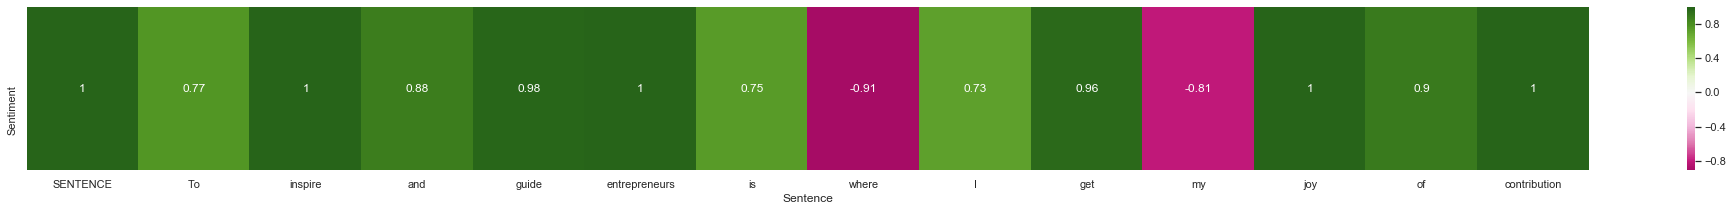

In [76]:
# configure size of heatmap
sns.set(rc={'figure.figsize':(35,3)})

# function to visualize
def visualise_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

# model (for English semtiment analysis)
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')
flair_fast = flair.models.TextClassifier.load('sentiment-fast')

# text
sentence = "To inspire and guide entrepreneurs is where I get my joy of contribution"

# sentiment
s = flair.data.Sentence(cleanup(sentence))
flair_sentiment.predict(s)
total_sentiment = s.labels
print(total_sentiment[0])
sign = 1 if total_sentiment[0].value == 'POSITIVE' else -1
score = total_sentiment[0].score

# tokenize sentiments
tokens = [token.text for token in s.tokens]
ss = [flair.data.Sentence(s) for s in tokens]
[flair_sentiment.predict(s) for s in ss]
sentiments = [s.labels[0].score * (-1,1)[str(s.labels[0]).split()[0].startswith("POS")] for s in ss]

# heatmap
visualise_sentiments({
      "Sentence":["SENTENCE"] + tokens,
      "Sentiment":[total_sentiment[0].score *(-1,1)[str(total_sentiment[0]).split()[0].startswith("POS")]] + sentiments,
})

In [77]:
def load_data():
    # load data
    input_file = "./data/training.1600000.processed.noemoticon.csv"
    cols = ['sentiment','id','date','query_string','user','text']
    # utf-8 encoding makes error. so use latin-1 encoding
    data = pd.read_csv("./data/training.1600000.processed.noemoticon.csv",header=None, names=cols, encoding='latin-1')
    
    return data

In [78]:
def predict(text):
    #text = cleanup(text)
    # assume null sentence as negative
    if len(text) == 0:
        label = Label(score=-1, value='NEGATIVE')
        return label
    s = flair.data.Sentence(text)
    flair_sentiment.predict(s)
    total_sentiment = s.labels

    return total_sentiment[0]

In [79]:
def predict_fast(text):
    #text = cleanup(text)
    # assume null sentence as negative
    if len(text) == 0:
        label = Label(score=-1, value='NEGATIVE')
        return label
    s = flair.data.Sentence(text)
    flair_fast.predict(s)
    total_sentiment = s.labels

    return total_sentiment[0]

In [80]:
from textblob import TextBlob

def predict_TextBlob(text):
    #text = cleanup(text)
    # assume null sentence as negative
    if len(text) == 0:
        return -1
    # This polarity score is between -1 to 1
    polarity = TextBlob(text).sentiment.polarity
    return polarity

In [81]:
nltk.download('vader_lexicon')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

def predict_Vader(text):
    #text = cleanup(text)
    # Polarity score returns dictionary
    result = sid.polarity_scores(text)
    return result

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\firew\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [86]:
###
# Test Flair en-sentiment
###

data = load_data()

text = data['text']
#y_valid = data['sentiment']
list_data = text.tolist()
#list_valid = y_valid.tolist()
#print(list_data[:10])

pos_size = 0
pos_valid = 0
neg_size = 0
neg_valid = 0
THRESHOLD = 0.85

# use en-sentiment set (slower)

#negative set
for sentence in list_data[:10000]:
    total_sentiment = predict(cleanup(sentence))
#    if (total_sentiment.score > THRESHOLD):
    neg_size = neg_size + 1
    if (total_sentiment.value == 'NEGATIVE'):
        neg_valid = neg_valid + 1

#positive set
for sentence in list_data[800000:810000]:
    total_sentiment = predict(cleanup(sentence))
#    if (total_sentiment.score > THRESHOLD):
    pos_size = pos_size + 1
    if (total_sentiment.value == 'POSITIVE'):
        pos_valid = pos_valid + 1

print('Flair en-sentiment')
print(pos_size, pos_valid, 'positive accuracy=', pos_valid / pos_size)
print(neg_size, neg_valid, 'negative accuracy=', neg_valid / neg_size)
print(pos_size + neg_size , pos_valid + neg_valid, 'total accuracy=', (pos_valid + neg_valid) / (pos_size + neg_size))

Flair en-sentiment
10000 6814 positive accuracy= 0.6814
10000 7133 negative accuracy= 0.7133
20000 13947 total accuracy= 0.69735


In [82]:
###
# Test Flair sentiment-fast
###

data = load_data()

text = data['text']
#y_valid = data['sentiment']
list_data = text.tolist()
#list_valid = y_valid.tolist()
#print(list_data[:10])

pos_size = 0
pos_valid = 0
neg_size = 0
neg_valid = 0
THRESHOLD = 0.85

# use sentiment-fast set (faster)

#negative set
for sentence in list_data[:10000]:
    total_sentiment = predict_fast(cleanup(sentence))
#    if (total_sentiment.score > THRESHOLD):
    neg_size = neg_size + 1
    if (total_sentiment.value == 'NEGATIVE'):
        neg_valid = neg_valid + 1

#positive set
for sentence in list_data[800000:810000]:
    total_sentiment = predict_fast(cleanup(sentence))
#    if (total_sentiment.score > THRESHOLD):
    pos_size = pos_size + 1
    if (total_sentiment.value == 'POSITIVE'):
        pos_valid = pos_valid + 1

print('Flair sentiment-fast')
print(pos_size, pos_valid, 'positive accuracy=', pos_valid / pos_size)
print(neg_size, neg_valid, 'negative accuracy=', neg_valid / neg_size)
print(pos_size + neg_size , pos_valid + neg_valid, 'total accuracy=', (pos_valid + neg_valid) / (pos_size + neg_size))

Flair sentiment-fast
10000 6722 positive accuracy= 0.6722
10000 7286 negative accuracy= 0.7286
20000 14008 total accuracy= 0.7004


In [83]:
###
# Test Textblob
###

data = load_data()

text = data['text']
#y_valid = data['sentiment']
list_data = text.tolist()
#list_valid = y_valid.tolist()
#print(list_data[:10])

pos_size = 0
pos_valid = 0
neg_size = 0
neg_valid = 0
THRESHOLD = 0.01

#negative set
for sentence in list_data[:10000]:
    polarity = predict_TextBlob(cleanup(sentence))
#    if (polarity <= (0 - THRESHOLD)):
    neg_size = neg_size + 1
    if (polarity <= 0):
        neg_valid = neg_valid + 1

#positive set
for sentence in list_data[800000:810000]:
    polarity = predict_TextBlob(cleanup(sentence))
#    if (polarity > THRESHOLD):
    pos_size = pos_size + 1
    if (polarity > 0):
        pos_valid = pos_valid + 1

print('Textblob')
print(pos_size, pos_valid, 'positive accuracy=', pos_valid / pos_size)
print(neg_size, neg_valid, 'negative accuracy=', neg_valid / neg_size)
print(pos_size + neg_size , pos_valid + neg_valid, 'total accuracy=', (pos_valid + neg_valid) / (pos_size + neg_size))

Textblob
10000 5640 positive accuracy= 0.564
10000 6904 negative accuracy= 0.6904
20000 12544 total accuracy= 0.6272


In [84]:
###
# Test Vader
###

data = load_data()

text = data['text']
#y_valid = data['sentiment']
list_data = text.tolist()
#list_valid = y_valid.tolist()
#print(list_data[:10])

pos_size = 0
pos_valid = 0
neg_size = 0
neg_valid = 0
THRESHOLD = 0.1

#negative set
for sentence in list_data[:10000]:
    polarity = predict_Vader(cleanup(sentence))
#    if not polarity.get('pos') > THRESHOLD:
    neg_size = neg_size + 1
    if (polarity.get('neg') >= polarity.get('pos')):
        neg_valid = neg_valid + 1

#positive set
for sentence in list_data[800000:810000]:
    polarity = predict_Vader(cleanup(sentence))
#    if not polarity.get('neg') > THRESHOLD:
    pos_size = pos_size + 1
    if (polarity.get('neg') < polarity.get('pos')):
        pos_valid = pos_valid + 1

print('Vader')
print(pos_size, pos_valid, 'positive accuracy=', pos_valid / pos_size)
print(neg_size, neg_valid, 'negative accuracy=', neg_valid / neg_size)
print(pos_size + neg_size , pos_valid + neg_valid, 'total accuracy=', (pos_valid + neg_valid) / (pos_size + neg_size))

Vader
10000 6273 positive accuracy= 0.6273
10000 6839 negative accuracy= 0.6839
20000 13112 total accuracy= 0.6556


In [70]:
# use Ensemble method to find sentiment
# (flair, flair fast, textblob, vader)
# combined with defined rules, and if there is no rule, use equal weight for the dataset.
# return -1 if negative, 1 if positive
def predict_sentiment(text):
    clean = cleanup(text)
    sentiment1 = predict(clean)
    sentiment2 = predict_fast(clean)
    polarity1 = predict_TextBlob(clean)
    polarity2 = predict_Vader(clean)
    sentiment = 0
    
    if (polarity1 < 0):
        sentiment = sentiment - polarity1
        if (polarity1 <= -0.5):
            return -1 # negative
    elif (polarity1 > 0):
        sentiment = sentiment + polarity1
        if (polarity1 > 0.5):
            return 1 # positive
        
    if (polarity2.get('neg') > polarity2.get('pos')):
        #sentiment = sentiment - polarity2.get('neg')
        sentiment = sentiment + polarity2.get('compound')
        if not polarity2.get('pos') > 0.1:
            return -1 # negative
    elif (polarity2.get('neg') < polarity2.get('pos')):
        #sentiment = sentiment + polarity2.get('pos')
        sentiment = sentiment + polarity2.get('compound')
        
    if (sentiment1.value == 'NEGATIVE'):
        sentiment = sentiment - sentiment1.score
        if (sentiment1.score > 0.85):
            return -1 # negative
    elif (sentiment1.value == 'POSITIVE'):
        sentiment = sentiment + sentiment1.score
        if (sentiment1.score > 0.85):
            return 1 # positive
        
    if (sentiment2.value == 'NEGATIVE'):
        sentiment = sentiment - sentiment2.score
        if (sentiment2.score > 0.85):
            return -1 # negative
    elif (sentiment2.value == 'POSITIVE'):
        sentiment = sentiment + sentiment2.score
        if (sentiment2.score > 0.85):
            return 1 # positive
        
    if (sentiment > 0):
        return 1 # positive
    return -1 # negative

In [71]:
data = load_data()

text = data['text']
#y_valid = data['sentiment']
list_data = text.tolist()
#list_valid = y_valid.tolist()
#print(list_data[:10])

pos_size = 0
pos_valid = 0
neg_size = 0
neg_valid = 0

# use ensemble (flair, flair fast, textblob, vader)

#negative set
for sentence in list_data[:10000]:
    neg_size = neg_size + 1
    if predict_sentiment(sentence) == -1:
        neg_valid = neg_valid + 1

#positive set
for sentence in list_data[800000:810000]:
    pos_size = pos_size + 1
    if predict_sentiment(sentence) == 1:
        pos_valid = pos_valid + 1

print('Ensemble')
print(pos_size, pos_valid, 'positive accuracy=', pos_valid / pos_size)
print(neg_size, neg_valid, 'negative accuracy=', neg_valid / neg_size)
print(pos_size + neg_size , pos_valid + neg_valid, 'total accuracy=', (pos_valid + neg_valid) / (pos_size + neg_size))

Ensemble
10000 6889 positive accuracy= 0.6889
10000 7468 negative accuracy= 0.7468
20000 14357 total accuracy= 0.71785
